# Optional Lab: Logistic Regression

채점되지 않은 이 실습에서는 다음을 수행합니다.
- 시그모이드 함수(로지스틱 함수라고도 함) 살펴보기
- 시그모이드 함수를 사용하는 로지스틱 회귀 분석 살펴보기

In [8]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from lab_utils_common import draw_vthresh
plt.style.use('./deeplearning.mplstyle')

## Sigmoid or Logistic Function
<img align="left" src="./images/C1_W3_LogisticRegression_left.png"     style=" width:300px; padding: 10px; " >
강의 동영상에서 설명한 것처럼 분류 작업의 경우 주어진 $x$에서 $y$를 예측하는데 선형 회귀 모델 $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$를 사용하여 시작할 수 있습니다.
- 그러나 출력 변수 $y$가 0 또는 1이므로 분류 모델의 예측이 0과 1 사이가 되기를 바랍니다.
- 이는 모든 입력 값을 0과 1 사이의 값으로 매핑하는 "시그모이드 함수"를 사용하여 수행할 수 있습니다.


시그모이드 함수를 구현하고 이를 직접 살펴보겠습니다.

## Formula for Sigmoid function

시그모이드 함수의 공식은 다음과 같습니다.

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

로지스틱 회귀의 경우 z(시그모이드 함수에 대한 입력)는 선형 회귀 모델의 출력입니다.
- 단일 예의 경우 $z$는 스칼라입니다.
- 예제가 여러 개인 경우 $z$는 각 예제마다 $m$ 개의 값으로 구성된 벡터일 수 있습니다.
- 시그모이드 함수의 구현은 이러한 잠재적인 입력 형식을 모두 다루어야 합니다.
이것을 Python으로 구현해봅시다.


NumPy에는 [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)라는 함수가 있는데, 이는 입력 배열(`z`)에 있는 모든 요소의 지수($e^{ z}$)를 계산하는 편리한 방법입니다.
 
또한 아래와 같이 단일 숫자를 입력으로 사용하여 작동도 합니다.

In [9]:
# Input is an array. 
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.718  7.389 20.086]
Input to exp: 1
Output of exp: 2.718281828459045


'시그모이드(sigmoid)' 함수는 아래 셀과 같이 Python으로 구현됩니다.

In [10]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

`z`의 다양한 값에 대한 이 함수의 출력이 무엇인지 살펴보겠습니다.

In [11]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


왼쪽 열의 값은 'z'이고, 오른쪽 열의 값은 'sigmoid(z)'입니다. 보시다시피, 시그모이드에 대한 입력 값의 범위는 -10~10이고, 출력 값의 범위는 0~1입니다.

이제 `matplotlib` 라이브러리를 사용하여 이 함수를 플로팅해 보겠습니다.

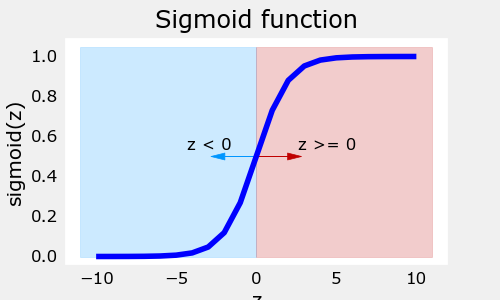

In [12]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

보시다시피 시그모이드 함수는 `z` 가 큰 음수 값으로 갈수록  `0`에 가까워지고, `z` 가 큰 양수 값으로 갈수록 `1` 에 가까워집니다.


## Logistic Regression
<img align="left" src="./images/C1_W3_LogisticRegression_right.png"     style=" width:300px; padding: 10px; " > 로지스틱 회귀 모델은 아래와 같이 익숙한 선형 회귀 모델에 시그모이드를 적용합니다.

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$

   여기에서,

   $g(z) = \frac{1}{1+e^{-z}}\tag{3}$
   

종양 분류의 범주형 데이터 예에 로지스틱 회귀를 적용해 보겠습니다.
먼저 매개변수의 예제와 초기값을 로드합니다.

In [13]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

다음 단계를 시도해 보세요.
- 주어진 훈련 데이터에 가장 적합한 로지스틱 회귀 모델을 찾으려면 '로지스틱 회귀 실행(Run Logistic Regression)'을 클릭하세요.
     - 결과 모델이 데이터에 매우 잘 맞는다는 점에 유의하세요.
     - 주황색 선은 위의 '$z$' 또는 $\mathbf{w} \cdot \mathbf{x}^{(i)} + b$입니다. 선형 회귀 모델의 선과 일치하지 않습니다.
*임계값(threshold)*을 적용하여 이러한 결과를 더욱 개선하세요.
- 임계값이 적용된 경우 예측을 표시하려면 '토글 0.5 임계값(Toggle 0.5 threshold)' 상자를 선택합니다.
     - 예측이 좋아 보이는군요. 예측이 데이터와 일치합니다.
     - 이제 큰 종양 크기 범위(거의 10)에 추가 데이터 포인트를 추가하고 로지스틱 회귀 분석을 다시 실행합니다.
     - 선형 회귀 모델과 달리 이 모델은 계속해서 올바른 예측을 합니다.

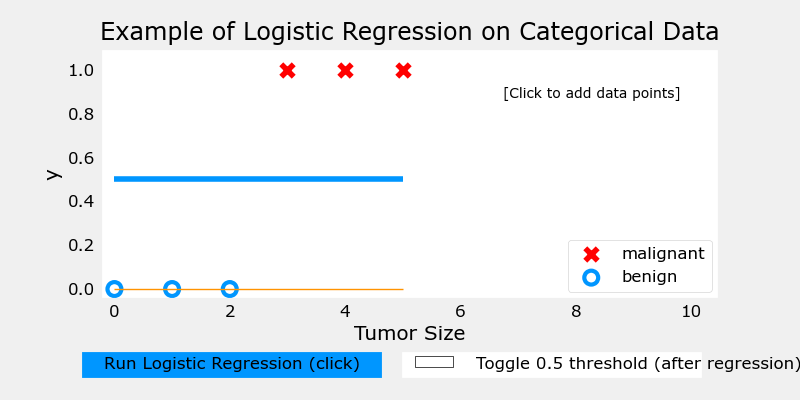

In [14]:
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)

## Congratulations!
로지스틱 회귀 분석에서 시그모이드 함수의 사용을 살펴보았습니다.